In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from dmba import regressionSummary
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv',index_col=0)

# Exploratory data analysis 

In [65]:
#obtain the shape of the dataset
df.shape

(1460, 80)

In [66]:
#obtain basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [67]:
#review the first five rows of the dataset
with pd.option_context('display.max_columns', None):
  display (df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
#obtain the basic information of the target variable (SalePrice)
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Handle Missing Value
Because the data is small, the team try to impute the missing value other than removing them.

In [3]:
#look for missing values
df1 = df.isnull().sum()
df1[df1 != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [70]:
# Change the 'NA' to median value for LotFrontage column
df['LotFrontage'] = df['LotFrontage'] .fillna(value=df['LotFrontage'].median())

In [71]:
# fill'No_Alley' for missing values in Alley column
df['Alley'] = df['Alley'].fillna('No_Alley')
df.Alley.value_counts()

No_Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [72]:
# fill 'No_Basement' for missing value in BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')
df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [73]:
# Change the 'NA' to 'No_Basement' for BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')
df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [74]:
# Change the 'NA' to 'No_Basement' for BsmtCond column
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [75]:
# BsmtExposure has one more missing value than BsmtQual and No_Basement.
# Based on the exploration below, the addtional missing value indicates that the basement is not finished yet.
# the team decide use the most frequen to fill that addtional missing value 
# and fill'No_Basement'  to the rest.

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtExposure'].isnull()])
df.loc[949,'BsmtExposure']=df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df.BsmtExposure.value_counts()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
343,90,RL,69.0,8544,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
363,85,RL,64.0,7301,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,No_Basement,No_Basement,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


No             954
Av             221
Gd             134
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [76]:
# Change the 'NA' to 'No_Basement' for BsmtFinType1 column
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [77]:
# BsmtFinType2 has one more missing value than BsmtQual, No_Basement, and BsmtFinType1.
# Based on the exploration below, the addtional missing value indicates that the basement area (if multiple types) 
#is not finished yet. The team decide to assign Unifnshed (Unf) to fill this addtional missing value 
# and fill 'No_Basement' to the rest

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtFinType2'].isnull()])

df.loc[333,'BsmtFinType2']='Unf'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df.BsmtFinType2.value_counts()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
333,20,RL,85.0,10655,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
343,90,RL,69.0,8544,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,

Unf            1257
Rec              54
LwQ              46
No_Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [84]:
# Change the 'NA' to 'No_Fireplace' for FireplaceQu column
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')
df.FireplaceQu.value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [85]:
# Change the 'NA' to 'No_Garage' for GarageType column
df['GarageType'] = df['GarageType'].fillna('No_Garage')
df.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [86]:
# Change the 'NA' to 'No_Garage' for GarageFinish column
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')
df.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

In [87]:
# Change the 'NA' to 'No_Garage' for GarageQual column
df['GarageQual'] = df['GarageQual'].fillna('No_Garage')
df.GarageQual.value_counts()

TA           1311
No_Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [88]:
# Change the 'NA' to 'No_Garage' for GarageCond column
df['GarageCond'] = df['GarageCond'].fillna('No_Garage')
df.GarageCond.value_counts()

TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [89]:
# Change the 'NA' to 'No_Pool' for PoolQC column
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')
df.PoolQC.value_counts()

No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [90]:
# Change the 'NA' to 'No_Fence' for Fence column
df['Fence'] = df['Fence'].fillna('No_Fence')
df.Fence.value_counts()

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [91]:
# Change the 'NA' to 'No_MiscFeature' for MiscFeature column
df['MiscFeature'] = df['MiscFeature'].fillna('No_MiscFeature')
df.MiscFeature.value_counts()

No_MiscFeature    1406
Shed                49
Gar2                 2
Othr                 2
TenC                 1
Name: MiscFeature, dtype: int64

In [92]:
# Change the 'NA' to most frequent category for Electrical column
df['Electrical'] = df['Electrical'].fillna(value=df['Electrical'].mode()[0])

In [93]:
# Change the 'NA' to the most frequent category for MasVnrType column
df['MasVnrType'] = df['MasVnrType'].fillna(value=df['MasVnrType'].mode()[0])

In [94]:
# Change the 'NA' to 0 for MasVnrArea column
df['MasVnrArea'] = df['MasVnrArea'] .fillna(value=0)

In [95]:
# Change the 'NA' to 0 for LotFrontage column
df['GarageYrBlt'] = df['GarageYrBlt'] .fillna(value=0)

In [96]:
# recheck whether any missing value
df2 = df.isnull().sum()
df2[df2 != 0]

Series([], dtype: int64)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Handle any duplciate row

In [98]:
# Do not find duplciate row
df_dup=df.duplicated()
df_dup[df_dup]

Series([], dtype: bool)

# Preprocess the data type for further anlysis

In [99]:
# conver catogorical variables to category data type
df.MSSubClass=df.MSSubClass.astype('category')
for i in df.select_dtypes('object').columns:
    df[i]=df[i].astype('category')

In [100]:
# conver numeric variabless to integer data type based 
for i in df.select_dtypes('float64').columns:
    df[i]=df[i].astype('int64')

# Analyze target variable and relationship between variables

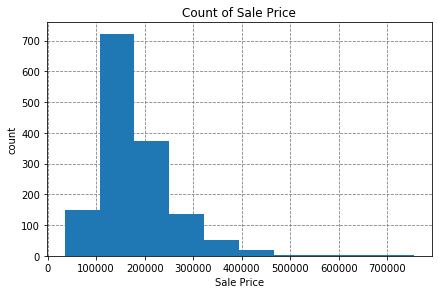

In [101]:
# Genearte the histgram for target variable 
fig, ax = plt.subplots()
ax.hist(df.SalePrice)
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

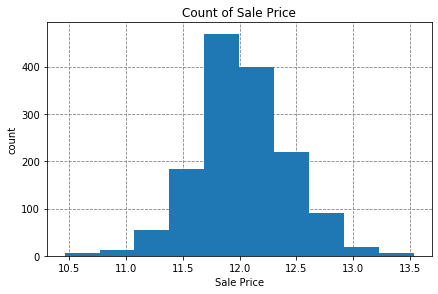

In [102]:
fig, ax = plt.subplots()
ax.hist(np.log(df.SalePrice))
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

Based on the above histogram, the team found that the distribution of saleprice is positive shewness. if using log tranformation, it is a normail distrubition.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.375045
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
GarageYrBlt      0.261366
CentralAir       0.251328
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
PoolArea    

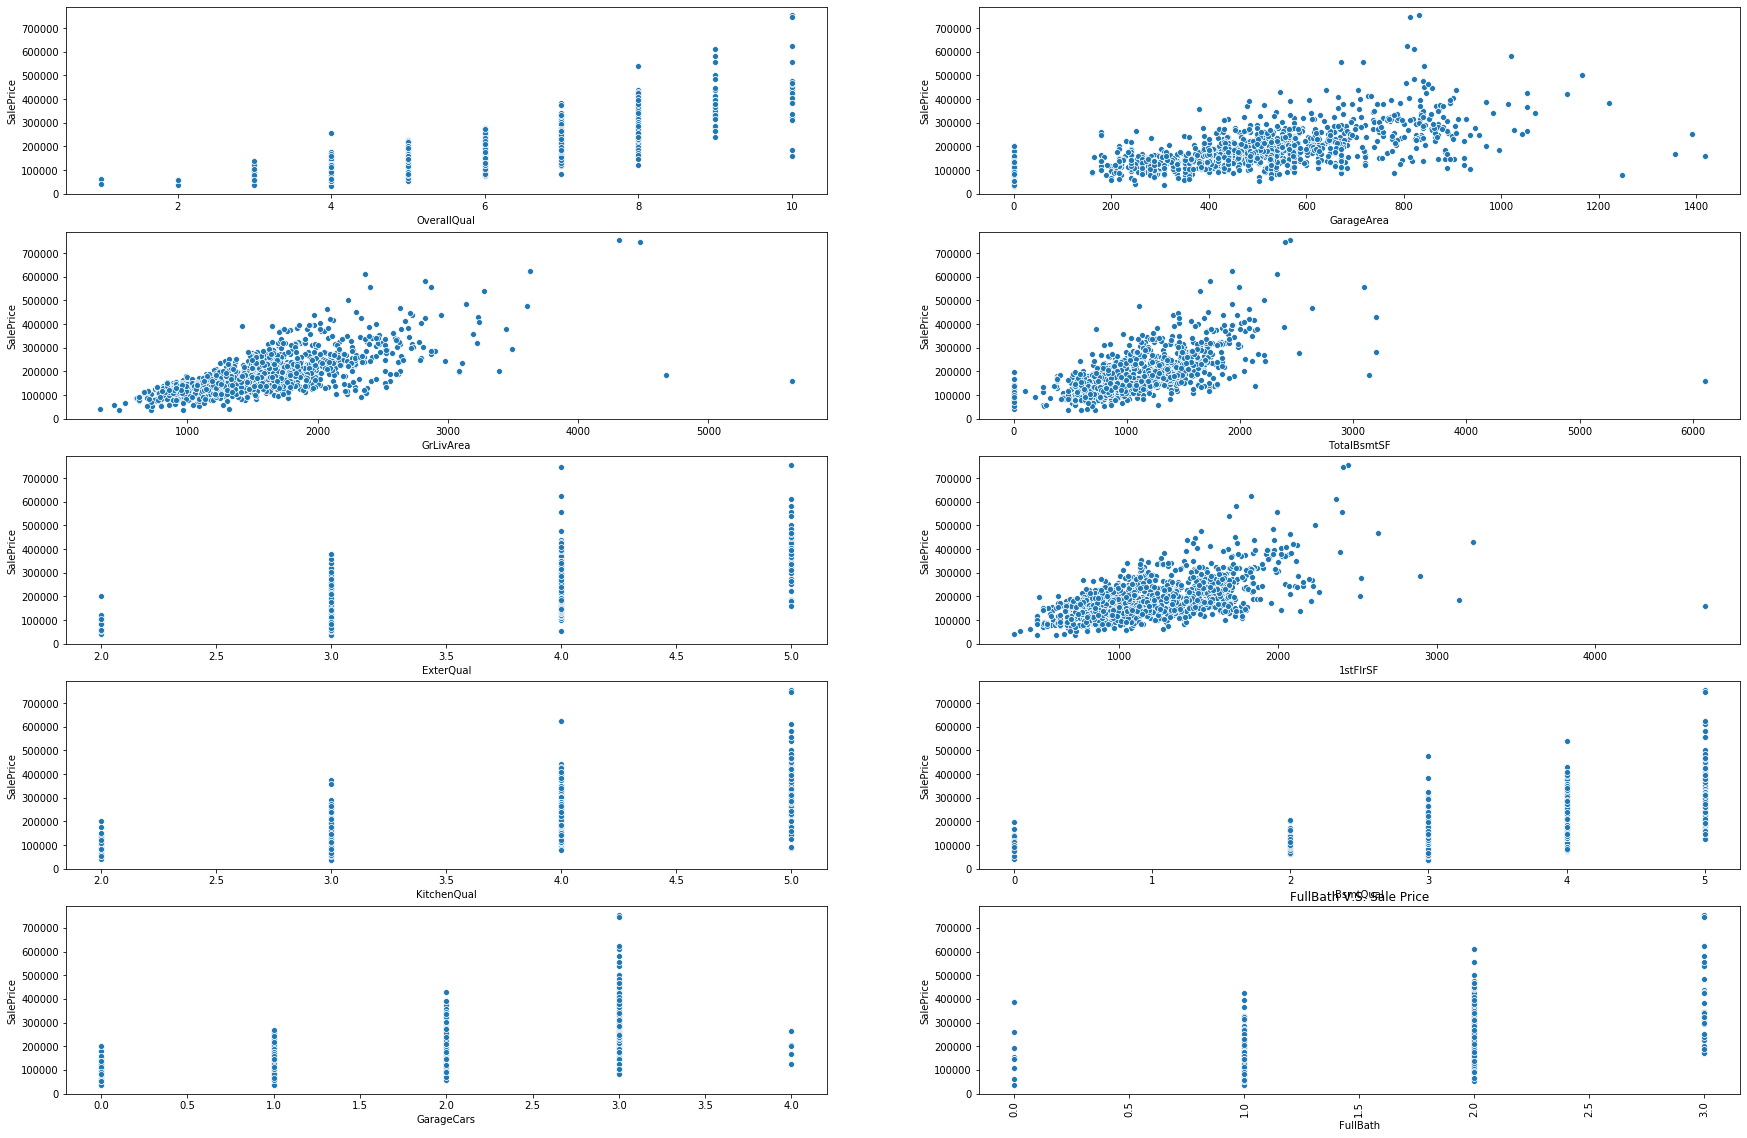

In [178]:
# calculate the correlation to identify the relationships between saleprice and other preditors
corrMatrix = df.corr()
print(corrMatrix.SalePrice.sort_values(ascending=False))

fig, axes = plt.subplots(5,2)
fig.set_size_inches(30, 20)
a=0
b=0
for i in (corrMatrix.SalePrice.sort_values(ascending=False).index[1:11]):
    sns.scatterplot(df[i], (df['SalePrice']),ax=axes[a,b])
    plt.title(str(i)+" V.S. Sale Price")
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)
    a += 1
    if a % 5 != 0:
        a += 0
        b += 0
    else: 
        a = 0
        b += 1
plt.show()

Based on the above correlation calucation and scatterplots, the team found that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt,YearRemodAdd have the correatlion ratio above 0.5 (positive relationship). 

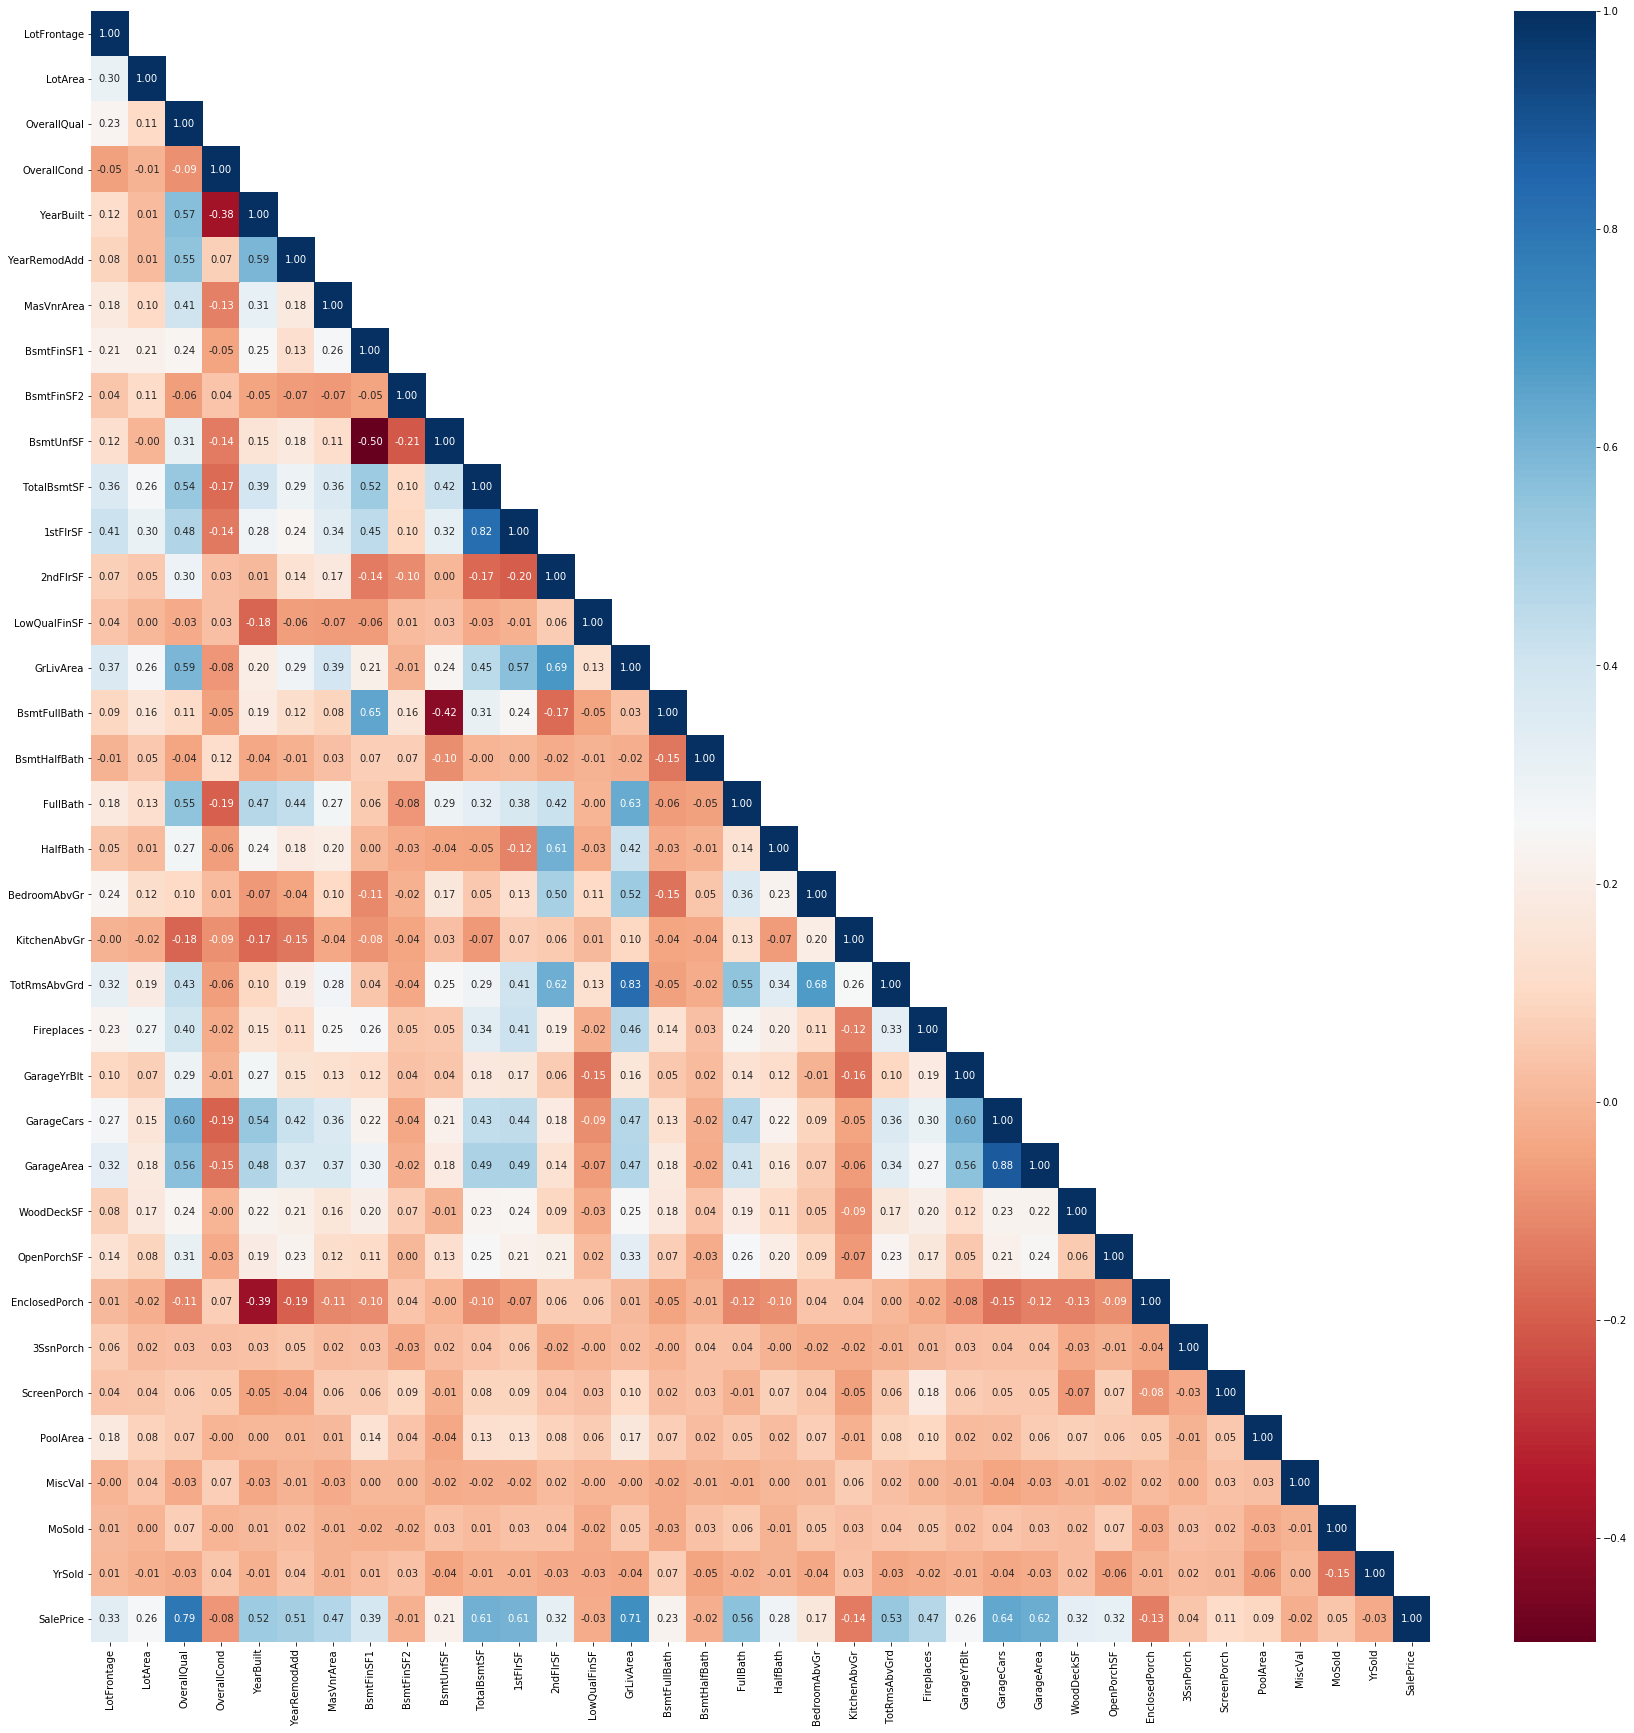

In [104]:
# To analyze the relationships among nemeric variables
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(df_lt, annot=True,fmt=".2f", cmap="RdBu", ax=ax)
fig.savefig("corr2.jpg")
plt.show()

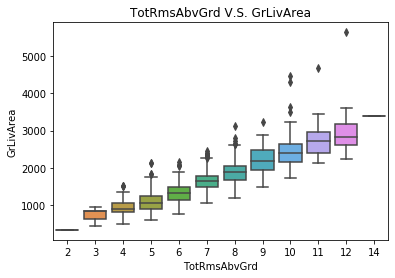

In [189]:
# Relation between TotRmsAbvGrd and GrLivArea
sns.boxplot(df['TotRmsAbvGrd'], df['GrLivArea'])
plt.title("TotRmsAbvGrd V.S. GrLivArea")
plt.xlabel('TotRmsAbvGrd')
plt.ylabel("GrLivArea")
plt.show()

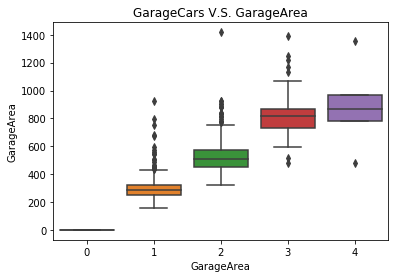

In [188]:
# Relation between GarageCars and GarageCars
sns.boxplot(df['GarageCars'], df['GarageArea'])
plt.title("GarageCars V.S. GarageArea")
plt.xlabel('GarageArea')
plt.ylabel("GarageArea")
plt.show()

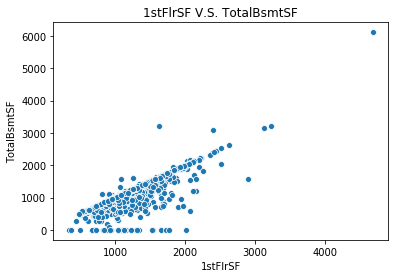

In [191]:
# Relation between 1stFlrSF and 1stFlrSF
sns.scatterplot(df['1stFlrSF'], df['TotalBsmtSF'])
plt.title("1stFlrSF V.S. TotalBsmtSF")
plt.xlabel('1stFlrSF')
plt.ylabel("TotalBsmtSF")
plt.show()

Based on the above heatmap, TotRmsAbvGrd has strong relationship with GrLivArea, GarageArea has strong relationship with GarageCars, and 1stFlrSF has strong relationship with TotalBsmtSF.

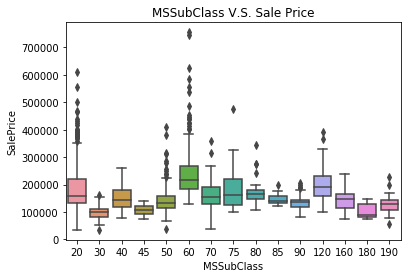

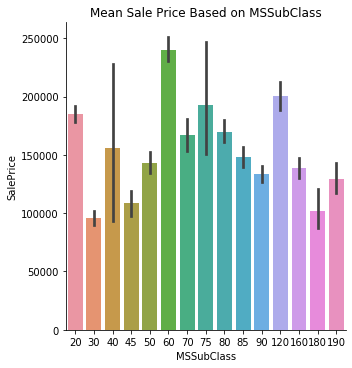

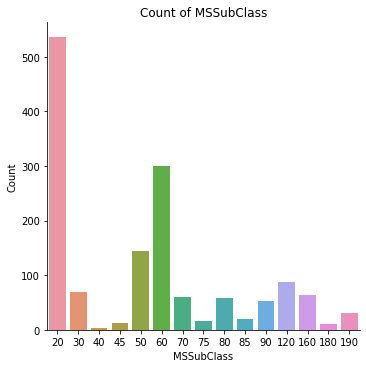

In [105]:
# Relation between MSSubClass and SalePrice
sns.boxplot(df['MSSubClass'], df['SalePrice'])
plt.title("MSSubClass V.S. Sale Price")
plt.xlabel('MSSubClass')
plt.ylabel("SalePrice")

sns.catplot(x='MSSubClass',y='SalePrice', data=df, kind='bar')
plt.title("Mean Sale Price Based on MSSubClass")
plt.xlabel('MSSubClass')
plt.ylabel("SalePrice")

sns.catplot(x='MSSubClass',data=df, kind='count')
plt.title("Count of MSSubClass")
plt.xlabel('MSSubClass')
plt.ylabel("Count")

plt.show()

 The meaning of each number from descriptiontion is as follows:
 
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Based on the charts above, it indicates that:
1. the age of house is a significatn important facotr in the sale price; House  is built on or after 1946 has a higheer sale price; 
2. the number of story is another important facotr in the sale price; 
3. the house that is whether finished or not is another impoartnt factor in the sale price.

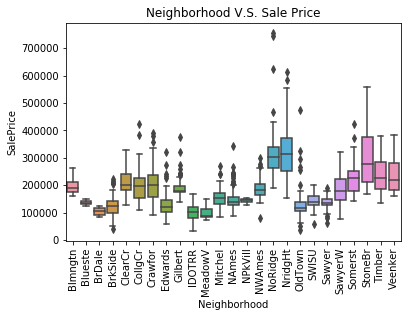

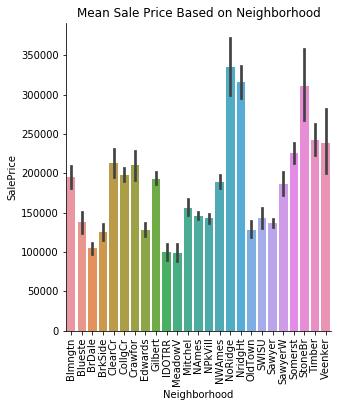

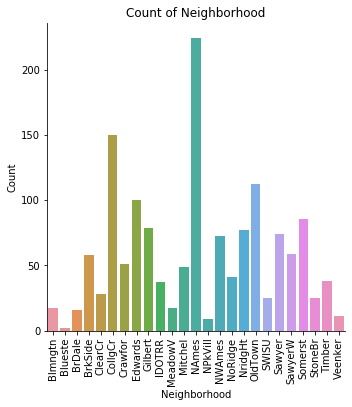

In [106]:
# Relation between Neighborhood and SalePrice
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.title("Neighborhood V.S. Sale Price")
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.ylabel("SalePrice")

sns.catplot(x='Neighborhood', y='SalePrice', data=df, kind='bar')
plt.title("Mean Sale Price Based on Neighborhood")
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.ylabel("SalePrice")

sns.catplot(x='Neighborhood',data=df, kind='count')
plt.title("Count of Neighborhood")
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

 The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker		

Based on the charts above, it indicates that the sale price is significantly affedct by the physical locations.

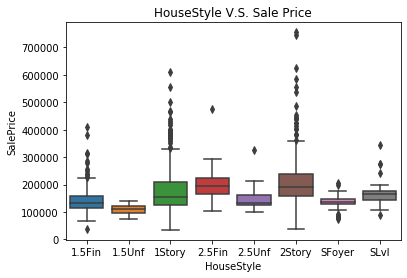

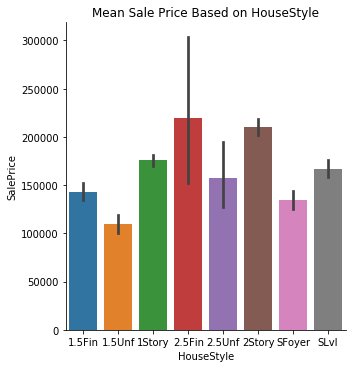

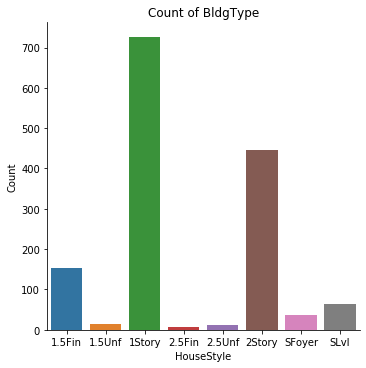

In [107]:
# Relation between HouseStyle and SalePrice
sns.boxplot(df['HouseStyle'], df['SalePrice'])
plt.title("HouseStyle V.S. Sale Price")
plt.xlabel('HouseStyle')
plt.ylabel("SalePrice")

sns.catplot(x='HouseStyle', y='SalePrice', data=df, kind='bar')
plt.title("Mean Sale Price Based on HouseStyle")
plt.xlabel('HouseStyle')
plt.ylabel("SalePrice")

sns.catplot(x='HouseStyle',data=df, kind='count')
plt.title("Count of BldgType")
plt.xlabel('HouseStyle')
plt.ylabel("Count")
plt.show()

In [108]:
excludeColumns = ('SalePrice')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'SalePrice'

The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl      Split Level

Based on the charts above, it confirmed the first thought based on the charts of MSSubClass:
1. the number of story is more, the sale price is higher; 
2. finished house is more expensive than unfinished house.

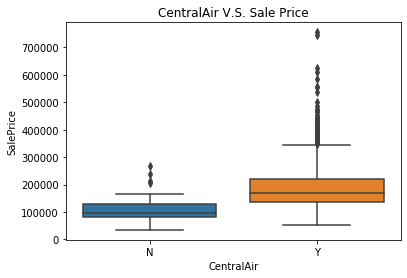

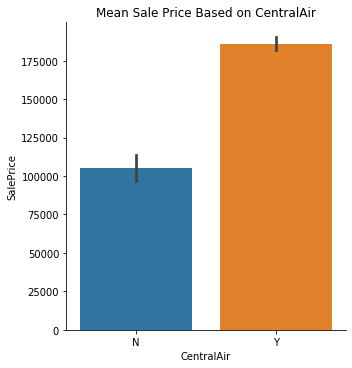

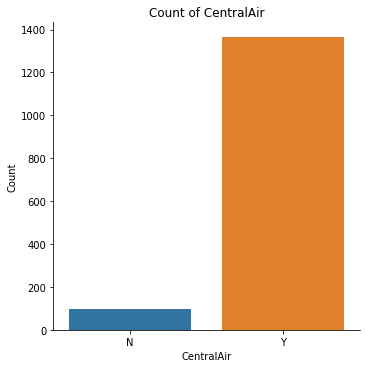

In [109]:
# Relation between CentralAir and SalePrice
sns.boxplot(df['CentralAir'], df['SalePrice'])
plt.title("CentralAir V.S. Sale Price")
plt.xlabel('CentralAir')
plt.ylabel("SalePrice")

sns.catplot(x='CentralAir', y='SalePrice', data=df, kind='bar')
plt.title("Mean Sale Price Based on CentralAir")
plt.xlabel('CentralAir')
plt.ylabel("SalePrice")

sns.catplot(x='CentralAir',data=df, kind='count')
plt.title("Count of CentralAir")
plt.xlabel('CentralAir')
plt.ylabel("Count")
plt.show()

The meaning of value in CentralAir (Central air conditioning) from descriptiontion is as follows:
 
       N	No
       Y	Yes

Based on the charts above, it indicates that house with central air conditioning has a higher sale price and mroe people perfer central air conditioning. 

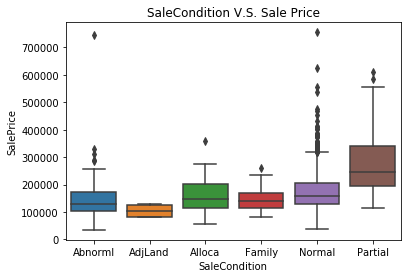

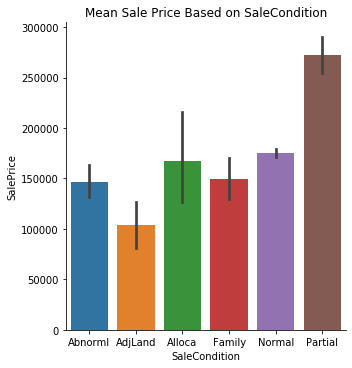

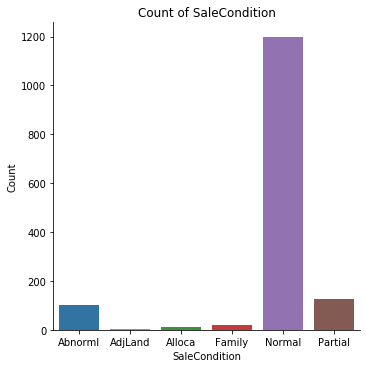

In [110]:
# Relation between SaleCondition and SalePrice
sns.boxplot(df['SaleCondition'], df['SalePrice'])
plt.title("SaleCondition V.S. Sale Price")
plt.xlabel('SaleCondition')
plt.ylabel("SalePrice")

sns.catplot(x='SaleCondition', y='SalePrice', data=df, kind='bar')
plt.title("Mean Sale Price Based on SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SalePrice")

sns.catplot(x='SaleCondition',data=df, kind='count')
plt.title("Count of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("Count")
plt.show()

The meaning of value in SaleCondition (Condition of sale) from descriptiontion is as follows:
 
       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Based on the charts above, it indicates that his  affedct by the sale condition. New contructed house usually has the higher sale price, and adjoining Land Purchase has the lowest sale price.

# Outlier

Becaue the size of the dataset is small, the team decides not to remvoe any outlier in this dataset at this point. 

# Development Baseline Model

Under the completion evaluation metric, each model will be evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [165]:
#Preare train dataset and validation dateset
excludeColumns = ('SalePrice')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x = pd.get_dummies(df[predictors],drop_first=True)
y = df[outcome]


In [162]:
#Random Forest Regressor
#train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
#rfr.fit(train_X, train_y)
#predictions = rfr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))

Root Mean Squared Error: 0.1584205148406261


In [166]:
# Random Forest Regressor with 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x, y, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.022', '-0.015', '-0.018', '-0.029', '-0.027', '-0.013', '-0.020', '-0.016', '-0.024', '-0.024']
Root Mean Squared Log Error: -0.020835029675997794


In [167]:
#Gradient Boosting Regressor
#gbr = GradientBoostingRegressor()
#gbr.fit(train_X, train_y)
#predictions = gbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))

In [160]:
#Gradient Boosting Regressor with 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x, y, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Accuracy scores of each fold:  ['-0.016', '-0.011', '-0.013', '-0.029', '-0.022', '-0.012', '-0.017', '-0.014', '-0.015', '-0.020']
Accuracy: -0.01710844262189981


# Select the most important features

In [ ]:
#Random Forest Regressor
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
rfr.fit(train_X, train_y)
predictions = rfr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))

#Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y)
#predictions = gbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))

In [116]:
rfr_coef=pd.DataFrame({'rfr_coefficient': rfr.feature_importances_}, index=x.columns).sort_values('rfr_coefficient',ascending=False)
rfr_coef
#with pd.option_context('display.max_rows', None):
  #display (coef)

,rfr_coefficient
OverallQual,0.512356
GrLivArea,0.114826
GarageCars,0.049733
TotalBsmtSF,0.037068
BsmtFinSF1,0.031242
...,...
RoofMatl_Metal,0.000000
PoolQC_Fa,0.000000
RoofMatl_Roll,0.000000
MiscFeature_TenC,0.000000


In [117]:
gbr_coef=pd.DataFrame({'gbr_coefficient': gbr.feature_importances_}, index=x.columns).sort_values('gbr_coefficient',ascending=False)
gbr_coef
#with pd.option_context('display.max_rows', None):
  #display (coef)

,gbr_coefficient
OverallQual,0.470202
GrLivArea,0.166415
GarageCars,0.057187
TotalBsmtSF,0.046755
1stFlrSF,0.032727
...,...
Exterior1st_CBlock,0.000000
Exterior1st_CemntBd,0.000000
Exterior1st_ImStucc,0.000000
Exterior1st_MetalSd,0.000000


Baed on the impoartant features from each model, the most importatn features are OverallQual, GrLivArea, TotalBsmtSF, GarageCars.

# Feature Enginnering

In [144]:
# Step 1 Quantify Variables
# Based on the descriton and nature of below variables, convert categorical values to numerical value to reduce the number
# of predictors in machine learning.
df2=df
df2.BsmtQual=df2.BsmtQual.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtCond=df2.BsmtCond.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtExposure=df2.BsmtExposure.replace(['Gd','Av','Mn','No','No_Basement'],[4,3,2,1,0])
df2.BsmtFinType1=df2.BsmtFinType1.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.BsmtFinType2=df2.BsmtFinType2.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.FireplaceQu=df2.FireplaceQu.replace(['Ex','Gd','TA','Fa','Po','No_Fireplace'],[5,4,3,2,1,0])
df2.GarageFinish=df2.GarageFinish.replace(['Fin','RFn','Unf','No_Garage'],[3,2,1,0])
df2.GarageQual=df2.GarageQual.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.GarageCond=df2.GarageCond.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.PoolQC=df2.PoolQC.replace(['Ex','Gd','TA','Fa','No_Pool'],[4,3,2,1,0])
df2.ExterQual=df2.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.ExterCond=df2.ExterCond.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.KitchenQual=df2.KitchenQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.HeatingQC=df2.HeatingQC.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.CentralAir=df2.CentralAir.replace(['N','Y'],[0,1])

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [168]:
#Preare train dataset and validation dateset
excludeColumns = ('SalePrice')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x2 = pd.get_dummies(df2[predictors],drop_first=True)
y2 = df2[outcome]

In [149]:
#Random Forest Regressor
#rfr.fit(train_X2, train_y2)
#predictions = rfr.predict(valid_X2)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y2), np.log(predictions))))

Root Mean Squared Error: 0.15518544553014835


In [169]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x2, y2, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.022', '-0.014', '-0.017', '-0.029', '-0.026', '-0.013', '-0.021', '-0.015', '-0.023', '-0.023']
Root Mean Squared Log Error: -0.020442635822188186


In [150]:
#Gradient Boosting Regressor
#gbr = GradientBoostingRegressor()
#gbr.fit(train_X2, train_y2)
#predictions = gbr.predict(valid_X2)
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y2), np.log(predictions))))

Root Mean Squared Error: 0.14422042800453816


In [170]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x2, y2, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.017', '-0.012', '-0.013', '-0.030', '-0.021', '-0.012', '-0.018', '-0.015', '-0.014', '-0.019']
Root Mean Squared Log Error: -0.017124188375427944


Converting a little improvement from xx to xx

In [174]:
# step 2 Log_tranformation
# As the histgram shows sale price is positive shewness and it becomes normal distrubiton wiht log-tranformation,
# it is better to conduct log-tranformation on saleprice. 
y3 = np.log(df2[outcome])
x3=x2

In [175]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.022', '-0.015', '-0.018', '-0.029', '-0.028', '-0.013', '-0.018', '-0.014', '-0.022', '-0.023']
Root Mean Squared Log Error: -0.020299382485491322


In [177]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.017', '-0.010', '-0.013', '-0.027', '-0.022', '-0.012', '-0.018', '-0.012', '-0.014', '-0.019']
Root Mean Squared Log Error: -0.016380336550608977


 log-tranformation, a little improvement from xx to xx

In [214]:
# Method 3 Adjust Features
# 1. Because sale price is higher for new house but this information is lacked, the team decides to add a new feature 'age.' 
#df2['age']=df2['YrSold']-df2['YearBuilt']
# 2. As generating a new feature above, the team decides to remove MoSold.
df2.drop(columns=['MoSold'])
# 3. Becuase GrLivArea, one of the most importatnt features, has a strong position relationship with TotRmsAbvGrd, and Bedroom
# indicates the total number of bedrooms above grade, the team decides to remove this TotRmsAbvGrd
#df2.drop(columns=['TotRmsAbvGrd'],inplace=True)
#4. To generate an aggreate variable including all bathrooms in the house and remove the original variables.
#df2['Bathroom'] = df2['BsmtFullBath']+0.5*df2['BsmtHalfBath']+df2['FullBath']+0.5*df2['HalfBath']
#df2.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],inplace=True)
# 5. Becuase GarageArea has strong relationship with GarageCars and they are interchanable, the team decides to remove GarageArea
#df2.drop(columns=['GarageArea'],inplace=True)
# 6. Becuase 1stFlrSF has strong relationship with TotalBsmtSF, the team decides to generate an aggreate variable 
# including each follor square feet in the house and remove the original variables. 
#df2['TotalSF']=df2['TotalBsmtSF'] + df2['1stFlrSF'] + df2['2ndFlrSF']
#df2.drop(columns=['TotalBsmtSF','1stFlrSF','2ndFlrSF'],inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,age,Bathroom,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,No_Fence,No_MiscFeature,0,2008,WD,Normal,208500,5,3.5,2566
2,20,RL,80,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,No_Fence,No_MiscFeature,0,2007,WD,Normal,181500,31,2.5,2524
3,60,RL,68,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,No_Fence,No_MiscFeature,0,2008,WD,Normal,223500,7,3.5,2706
4,70,RL,60,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,No_Fence,No_MiscFeature,0,2006,WD,Abnorml,140000,91,2.0,2473
5,60,RL,84,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,No_Fence,No_MiscFeature,0,2008,WD,Normal,250000,8,3.5,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62,7917,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,No_Fence,No_MiscFeature,0,2007,WD,Normal,175000,8,2.5,2600
1457,20,RL,85,13175,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,MnPrv,No_MiscFeature,0,2010,WD,Normal,210000,32,3.0,3615
1458,70,RL,66,9042,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,2500,2010,WD,Normal,266500,69,2.0,3492


In [211]:
predictors = [s for s in df.columns if s not in excludeColumns]
y3 = np.log(df2[outcome])
x3=pd.get_dummies(df2[predictors],drop_first=True)

In [212]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.021', '-0.014', '-0.019', '-0.028', '-0.028', '-0.015', '-0.018', '-0.015', '-0.022', '-0.024']
Root Mean Squared Log Error: -0.020338707384698455


In [213]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.015', '-0.011', '-0.013', '-0.022', '-0.024', '-0.013', '-0.019', '-0.011', '-0.012', '-0.020']
Root Mean Squared Log Error: -0.01595654285477419


In [233]:
# PCA
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#predictors = [s for s in df.columns if s not in excludeColumns]
#y3 = np.log(df2[outcome])
#x3=pd.get_dummies(df2[predictors],drop_first=True)

#scaler = StandardScaler()
#train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)
#scaler.fit(x3)

#x3 = scaler.transform(x3)

#pca = PCA(.95)
#pca.fit(x3)

#pca.n_components_

#x3 = pca.transform(x3)

In [234]:
x3.shape

(1460, 144)

In [235]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.023', '-0.019', '-0.022', '-0.036', '-0.038', '-0.020', '-0.025', '-0.016', '-0.033', '-0.021']
Root Mean Squared Log Error: -0.025365208696446324


In [236]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

Root Mean Squared Log Error:  ['-0.019', '-0.017', '-0.018', '-0.033', '-0.034', '-0.018', '-0.023', '-0.014', '-0.026', '-0.021']
Root Mean Squared Log Error: -0.022430935025997512


# Parameter optimization

In [ ]:
#
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(train_X, train_y)
m_random.best_params_

In [ ]:
train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestRegressor(), hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x3, train_y3)
m_random.best_params_


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 19.9min


In [ ]:
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

In [ ]:
regressionSummary(valid_y, predictions)

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x, y, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print('Accuracy:', scores.mean())

In [ ]:
#stacking model
models = [MLPRegressor(**grid_parm_mlp), RandomForestRegressor(**grid_parm_rfc), DecisionTreeRegressor(**grid_parm)]
      
S_Train, S_Test = stacking(models, train_X, train_y, valid_X, regression=True, verbose=2)
model = RandomForestRegressor()  
model = model.fit(S_Train, y_train)
model_pred = model.predict(S_Test)

# 